<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023_DS/blob/main/Python/Python_Stats/Stats_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第4章 推測統計と区間推定（母分散既知）


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

## 推測統計
これまで学んできたのは**記述統計**です。これから学ぶ**推測統計**を学ぶには欠かせない分野でした。  

これから学習する推測統計は、母集団から抽出した標本を使って母集団の特性を推論するものになります。  
母集団を全て調べられるわけないですよねー。

標本を抽出する際はある程度ランダムになるように無作為に抽出することが多いです。  
標本の統計量（**標本統計量**）を使って、母集団の統計量（**母数**）を求めていきます。

（ここでは細かい説明は省いていますので、もう少し詳しく知りたい方は[こちら](https://bellcurve.jp/statistics/course/8003.html)を参考にしてください）

### 推定と検定


推測統計には大きく「**推定**」と「**検定**」があります。  

推定は、標本統計量を基に母数を推測するものです。  

検定は、母数の性質を想定（**仮定**）し、  
その仮定が正しいと言えるかどうかを標本を観察することで調べるものです。

ここでは推定について扱います。

### 推定
推定には**点推定**と**区間推定**というものがあります。

母数を1つの値で推定することを点推定、  
母数をある程度の区間を持って推定することを区間推定と言います。

点推定を実際に用いることはほとんどないため、ここでは区間推定についてのみ扱います。  
[こちら](https://bellcurve.jp/statistics/course/8608.html)で点推定の演習は積めるはずなので、関心のある方は是非。


### 区間推定
区間推定のステップは簡単に言うと以下の通りです。

①母集団から無作為抽出して標本を作成  
②標本から**推定量**（母数の推定に使う標本統計量）を計算  
③区間を設けて母数を推定（この区間を**信頼区間**といいます）  
④推定量の標本分布（標本統計量が従う分布）を考える  
⑤信頼区間がとりうる値を標本分布から算出する

言葉で言われてもイメージが湧かないと思います。  
個々の事例の際に詳しく解説するので、今は細かい説明はしません。

### 信頼係数・有意水準
③では、例えば「95%は信頼区間に入る」という風に区間を設けます。  
このように、ある区間に母数が含まれる確率のことを**信頼係数**といいます。

非常に厳しくする場合は**99%**、  
中位の厳しさの場合は**95%**（ほとんどのケースです）、  
非常に緩くする場合は**90%**に設定します。

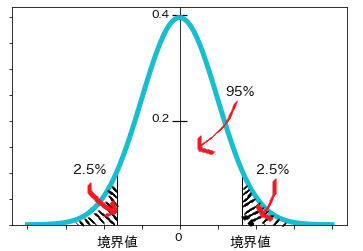

⑤の「信頼区間がとりうる値」というのは、上図の境界値のことをいいます。  
この境界値は**信頼限界**と呼ばれます。

大きいほうの信頼限界を**上方信頼限界**、小さいほうの信頼限界を**下方信頼限界**といいます。  
この両者の間が**信頼区間**です。

また、信頼係数とは反対に、「めったに起こらないことが起こる確率」のことを**有位水準**といいます。  
1から信頼係数を差し引いたものです。

このように、ある事象がめったに起こらないことを**「有意である」**(significant)、  
ある事象がよく起こることを**「有意でない」**(insignificant)といいます。


#### 標準正規分布


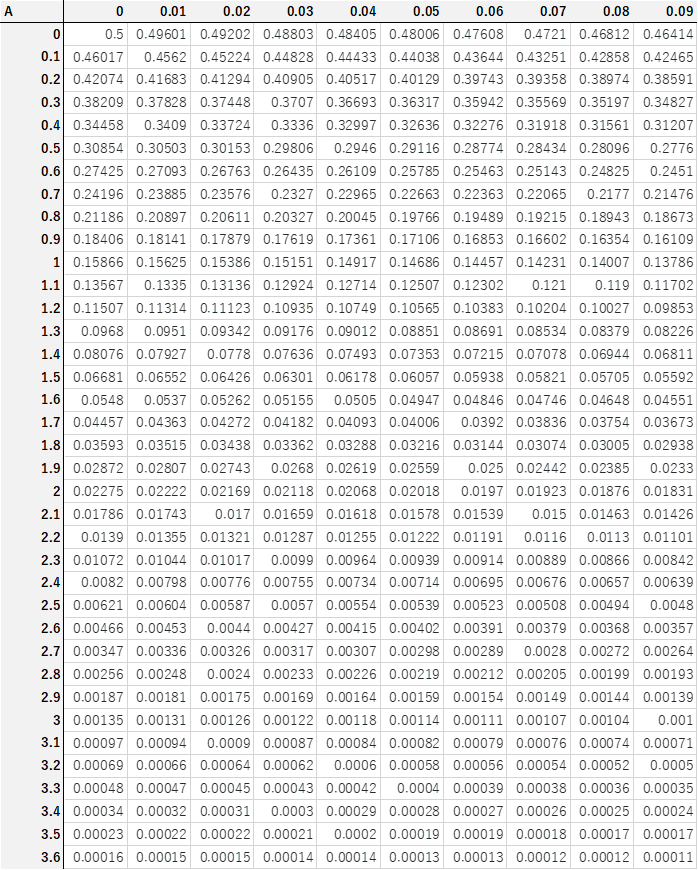

#### 演習
ここで上方・下方信頼限界を求める演習を入れます。  
必要のない方は飛ばしてください。

##### Question1
[こちら](https://bit.ly/3FMplJr)の正規分布の上方・下方信頼限界を求めてみましょう。

In [2]:
print("母平均172,母標準偏差5.5")
print("信頼係数95%")  # 仮定です
print("正規分布の有意な部分の面積はそれぞれ{}".format((1-0.95)/2))

母平均172,母標準偏差5.5
信頼係数95%
正規分布の有意な部分の面積はそれぞれ0.025000000000000022


ここで確率0.025に対応する信頼限界Aを正規分布表から読み取ります。

In [3]:
print("上方信頼限界A = 1.96")
print("下方信頼限界-A = -1.96")

上方信頼限界A = 1.96
下方信頼限界-A = -1.96


In [4]:
# Pythonによる導出方法
A = round(norm.isf(q=0.025),3)

print("上方信頼限界A = {}".format(A))
print("下方信頼限界-A = {}".format(-A))

上方信頼限界A = 1.96
下方信頼限界-A = -1.96


標準化の逆を行うことで、$A$を変数$X$に戻します。

In [5]:
print("X = σ×A+μ = 1.96×5.5+172 = {}".format(1.96*5.5+172))  # 上方信頼限界
print("X = -σ×A+μ = -1.96×5.5+172 = {}".format(-1.96*5.5+172))  # 下方信頼限界

X = σ×A+μ = 1.96×5.5+172 = 182.78
X = -σ×A+μ = -1.96×5.5+172 = 161.22


In [6]:
# Pythonによる導出方法
x1,x2 = stats.norm.interval(alpha=0.95,loc=172,scale=5.5)  # 下方信頼限界 , 上方信頼限界

print("X = {}".format(x2))  # 上方信頼限界
print("X = {}".format(x1))  # 下方信頼限界

X = 182.7798019149703
X = 161.2201980850297


161.22cm ～ 182.78cm 以内に入っていない身長は、有意な大きさであるといえます。

##### Question2
次に[こちら](https://bit.ly/3UdKbpt)の英語と数学の点数の上方・下方信頼限界を求めてみましょう。  
（数学の平均点は66点であるとします）

In [7]:
# 英語

print("母平均85,母標準偏差4")
print("信頼係数95%")  # 仮定です
#print("正規分布の有意な部分の面積はそれぞれ{}".format((1-0.95)/2))
print("上方信頼限界A = 1.96")
print("下方信頼限界-A = -1.96")

print("X = σ×A+μ = 1.96×4+85 = {}".format(1.96*4+85))  # 上方信頼限界
print("X = -σ×A+μ = -1.96×4+85 = {}".format(-1.96*4+85))  # 下方信頼限界

母平均85,母標準偏差4
信頼係数95%
上方信頼限界A = 1.96
下方信頼限界-A = -1.96
X = σ×A+μ = 1.96×4+85 = 92.84
X = -σ×A+μ = -1.96×4+85 = 77.16


In [8]:
# Pythonによる導出方法
x1,x2 = stats.norm.interval(alpha=0.95,loc=85,scale=4)  # 下方信頼限界,上方信頼限界

print("X = {}".format(x2))  # 上方信頼限界
print("X = {}".format(x1))  # 下方信頼限界

X = 92.83985593816021
X = 77.16014406183979


In [9]:
# 数学

print("母平均66,母標準偏差10")
print("信頼係数95%")    # 仮定です
# print("正規分布の有意な部分の面積はそれぞれ{}".format((1-0.95)/2))
print("上方信頼限界A = 1.96")
print("下方信頼限界-A = -1.96")

print("X = σ×A+μ = 1.96×10+66 = {}".format(1.96*10+66))  # 上方信頼限界
print("X = -σ×A+μ = -1.96×10+66 = {}".format(-1.96*10+66))  # 下方信頼限界

母平均66,母標準偏差10
信頼係数95%
上方信頼限界A = 1.96
下方信頼限界-A = -1.96
X = σ×A+μ = 1.96×10+66 = 85.6
X = -σ×A+μ = -1.96×10+66 = 46.4


In [10]:
# Pythonによる導出方法
x1,x2 = stats.norm.interval(alpha=0.95,loc=66,scale=10)  # 下方信頼限界,上方信頼限界

print("X = {}".format(x2))  # 上方信頼限界
print("X = {}".format(x1))  # 下方信頼限界

X = 85.59963984540053
X = 46.40036015459946


## 平均値の区間推定（母分散既知）

ここまでの知識を使って、いよいよ区間推定に移っていきます！  
まずは母平均の区間推定からです。

求めるためにはいくつか方法がありますが、ここでは母分散は知っているものとします。  
（現実ではありえないケースです）

先ほど述べた区間推定のステップに従って始めましょう！

### ① 母集団から無作為抽出して標本を作成
母集団の平均を$μ$とし、標本の大きさを$n$とします。

### ② 標本から推定量を計算
今回は標本平均が推定量となります。これを$\bar{x}$とします。



### ③ 信頼区間を設けて母数を推定
信頼区間は95%とすることが多いです。

### ④ 推定量の標本分布を考える ※最重要
標本平均の標本分布について考えてみましょう。  
**ここが最重要です.**








なんと、  
「標本平均$\bar{x}$の標本分布は、**母集団の分布がどんな分布であっても**  
$n$を大きくすると平均$μ$、標準偏差$\frac{σ}{\sqrt{n}}$の正規分布になる」  
ということが知られています。

この定理のことを**中心極限定理**といいます。（ラプラスさんが発見しました）

[こちら](https://bit.ly/3fFShrM)の図を見ていただければイメージが湧きやすいと思います。  

※ここらへんはかなり経緯を飛ばしていますので   
経緯に関心がある方は[こちら](https://bit.ly/3WEj7RP)から順に経緯を追っていってもらえればと思います。





標本平均の標本分布の平均と標準偏差が分かったところで、**標準化**して分かりやすくしましょう。  
標準化の式は以下の通りです。

$$
z=\frac{\bar{x}-μ}{\frac{σ}{\sqrt{n}}}
$$

### ⑤ 信頼区間がとりうる値を標本分布から算出する
あとは$μ$に対して計算して値を出していくだけです。

$$
\bar{x}-z\frac{σ}{\sqrt{n}} < μ < \bar{x}+z\frac{σ}{\sqrt{n}}
$$

### Pythonによる区間推定
[こちら](https://bit.ly/3FSPFS5)の演習問題の区間推定を行ってみましょう。  

手計算で行いたい方はこれまで示してきたステップを踏んでもらえればと思います。  
Pythonでは簡単に区間推定ができますので紹介します。

In [11]:
# Pythonによる導出方法
x1,x2 = stats.norm.interval(alpha=0.90,loc=93.8,scale=np.sqrt(5560/10))
x1 = Decimal(str(x1)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)

print("スクリーン数の母平均の区間推定結果は信頼係数90%のもとで")
print("{} ≦ μ ≦ {}".format(x1,x2))

スクリーン数の母平均の区間推定結果は信頼係数90%のもとで
55.0 ≦ μ ≦ 132.6


In [12]:
# Pythonによる導出方法
x1,x2 = stats.norm.interval(alpha=0.95,loc=93.8,scale=np.sqrt(5560/10))
x1 = Decimal(str(x1)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)

print("スクリーン数の母平均の区間推定結果は信頼係数95%のもとで")
print("{} ≦ μ ≦ {}".format(x1,x2))

スクリーン数の母平均の区間推定結果は信頼係数95%のもとで
47.6 ≦ μ ≦ 140.0


In [13]:
# Pythonによる導出方法
x1,x2 = stats.norm.interval(alpha=0.99,loc=93.8,scale=np.sqrt(5560/10))
x1 = Decimal(str(x1)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)

print("スクリーン数の母平均の区間推定結果は信頼係数99%のもとで")
print("{} ≦ μ ≦ {}".format(x1,x2))

スクリーン数の母平均の区間推定結果は信頼係数99%のもとで
33.1 ≦ μ ≦ 154.5


初めて信頼係数90%と99%のものが出てきたので、手計算で解く方に少し注意があります。  
関係のない方は飛ばして演習などに入ってもらえればと思います。

### 信頼係数90%,99%の際の注意（手計算）
信頼係数が90%,99%の場合は、信頼限界$A$を求める際に少し注意が必要です。

#### 信頼係数90%

In [14]:
print("信頼係数90%")
print("正規分布の有意な部分の面積はそれぞれ{}".format((1-0.90)/2))

信頼係数90%
正規分布の有意な部分の面積はそれぞれ0.04999999999999999


ここで求めたい$z$の値が1.64(0.0505)と1.65(0.04947)の間になってしまったので、  
中間値の**1.645**を信頼限界$A$とするのが慣習です。

In [15]:
print("上方信頼限界A = 1.645")
print("下方信頼限界-A = -1.645") 
print("上方信頼限界A = {}".format(norm.isf(q=0.05)))  # 厳密解

上方信頼限界A = 1.645
下方信頼限界-A = -1.645
上方信頼限界A = 1.6448536269514729


#### 信頼係数99%

In [16]:
print("信頼係数99%")
print("正規分布の有意な部分の面積はそれぞれ{}".format((1-0.99)/2))

信頼係数99%
正規分布の有意な部分の面積はそれぞれ0.0050000000000000044


ここで求めたい$z$の値が2.57(0.00508)と2.58(0.00494)の間になってしまったので、  
中間値の**2.575**を信頼限界$A$とするのが慣習です。

In [17]:
print("上方信頼限界A = 2.575")
print("下方信頼限界-A = -2.575") 
print("上方信頼限界A = {}".format(norm.isf(q=0.005)))  # 厳密解

上方信頼限界A = 2.575
下方信頼限界-A = -2.575
上方信頼限界A = 2.575829303548901


### 演習
演習をして第4章は終了です。

まずは[こちら](https://bit.ly/3zSLSR7)の問題を区間推定してみましょう。

In [18]:
# Pythonによる導出方法
x1,x2 = stats.norm.interval(alpha=0.90,loc=67,scale=9.0/np.sqrt(100))
x1 = Decimal(str(x1)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)

print("日本人男性の体重の母平均の区間推定結果は信頼係数90%のもとで")
print("{}kg ≦ μ ≦ {}kg".format(x1,x2))

日本人男性の体重の母平均の区間推定結果は信頼係数90%のもとで
65.5kg ≦ μ ≦ 68.5kg


続いて[こちら](https://bit.ly/3UtUxB2)の問題を区間推定してみましょう。

In [19]:
# Pythonによる導出方法
x1,x2 = stats.norm.interval(alpha=0.95,loc=158,scale=5.3/np.sqrt(400))
x1 = Decimal(str(x1)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)

print("日本人女性の身長の母平均の区間推定結果は信頼係数95%のもとで")
print("{}cm ≦ μ ≦ {}cm".format(x1,x2))

日本人女性の身長の母平均の区間推定結果は信頼係数95%のもとで
157.5cm ≦ μ ≦ 158.5cm


最後に[こちら](https://bit.ly/3NGl4ct)の問題を区間推定してみましょう。

In [20]:
# Pythonによる導出方法
x1,x2 = stats.norm.interval(alpha=0.99,loc=49,scale=6.0/np.sqrt(100))
x1 = Decimal(str(x1)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)

print("日本人女性の体重の母平均の区間推定結果は信頼係数99%のもとで")
print("{}kg ≦ μ ≦ {}kg".format(x1,x2))

日本人女性の体重の母平均の区間推定結果は信頼係数99%のもとで
47.5kg ≦ μ ≦ 50.5kg


## 補足
最後に、有名Youtuberヨビノリ先生の動画で参考になりそうなものを紹介しておきます。

①[母集団・標本](https://bit.ly/3UfjQaq)  
②[点推定](https://bit.ly/3NLTuu8)  
③[区間推定（母分散既知）](https://bit.ly/3hdZOym)  
④[中心極限定理](https://bit.ly/3hkJegq)